# Regression

### continuous data

In [1]:
# Importing modules
import pandas as pd
import quandl, math, datetime, pickle
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean

style.use('ggplot')


In [2]:
#Getting data
df =  quandl.get('WIKI/GOOGL') 

In [3]:
# Curating the data according to our needs
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [4]:
## Volume means how many trades occured that day. 

In [5]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
df['HL_PCT']  = ((df['Adj. High'] - df['Adj. Low'])/df['Adj. Low'])*100

In [7]:
df['PCT_change'] = ((df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'])*100

In [8]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.441017,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,8.537313,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.062357,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.753210,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.966115,1.183658


In [9]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [10]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


### Features : X variables/ dependent variables
### Label : Response variable 

In [11]:
## Replacing NaN values with outliers 

df.fillna(-9999, inplace=True)

## Setting up the label(response variable)

forecast_col = 'Adj. Close'

forecast_out = int(math.ceil(0.01*(len(df)))) 
## this 0.01 decides how much into future we wanna dive, for this dataset it means 24.3 days into the future. 
## Comparing label to Adj. Close should tell us what to choose as the value of 0.01, coz label and Adj. Close should be kinda close. 

forecast_out =365


In [12]:
## Getting future values and setting those in label , shifting negatively shifts column values up wards
df['label'] = df[forecast_col].shift(-forecast_out)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,216.999908
2004-08-20,54.322689,8.537313,7.227007,22834300.0,201.512048
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,198.633162
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,191.368235
2004-08-25,53.164113,3.966115,1.183658,9188600.0,193.146224


In [13]:
# Dropping Nan value rows
# df.dropna(inplace=True)

df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2016-10-17,806.84,1.201747,0.105460,1046862.0,NaN
2016-10-18,821.49,1.903286,0.894118,2267853.0,NaN
2016-10-19,827.09,0.802352,0.311697,1437490.0,NaN
2016-10-20,821.63,0.964597,-0.716564,1376677.0,NaN
2016-10-21,823.73,0.730774,0.454878,1563718.0,NaN


In [14]:
## Defining Features and label

# Features
X =  np.array(df.drop(['label'], 1))

# Label
# y = np.array(df['label'])

# Scaling the dataset

X = preprocessing.scale(X)

## All rows with nan as labels
X_lately = X[-forecast_out:]
## All rows with labels
X = X[:-forecast_out]



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "



Your preprocessed data may contain attributes with a mixtures of scales for various quantities such as dollars, kilograms and sales volume.

Many machine learning methods expect or are more effective if the data attributes have the same scale. Two popular data scaling methods are normalization and standardization.
 

## Data Normalization

Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.

It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.

The example below demonstrate data normalization of the Iris flowers dataset.

## Data Standardization

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

The example below demonstrate data standardization of the Iris flowers dataset.

# Caution: If preprocessing/scaling/normalization is done for training dataset then it needs to be done to every test and predict dataset too. 

In [15]:

df.dropna(inplace= True)

y = np.array(df['label'])

X.shape, y.shape

((2702, 4), (2702,))

In [16]:
## Splitting the dataset

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [17]:
# Instantiate the Reg model

linreg = LinearRegression()

# n_jobs = parallel processing speeds up. n_jobs = -1 uses max processing power our laptops provide. 

## Pickling and Scaling

### Pickling = Training a model takes a lot of time and resources and most times we don't want training it everytime we run the code right so we train it once pickle it and then use the pickled model for future needs. 

### Thus pickling saves a lot of time and resources. 

### Scaling: While dealing with large datasets where our laptops might just cry. We can use server services and there just while training our model we use high server and then pickle that model and scale down our requirements.



In [18]:
# Fit the Reg model

# linreg.fit(X_train, y_train)

# with open('linregre.pickle','wb') as f:
#     pickle.dump(linreg, f)

### After pickling now we can use model from pickle file

pickle_in = open('linregre.pickle', 'rb')
linreg = pickle.load(pickle_in)
# Predict on test set

accuracy = linreg.score(X_test, y_test)

print(accuracy)

0.749274628405


In [19]:
# Instantiate another reg model "SVR - Support Vector Regression"

svreg = svm.SVR(kernel='poly')

# Fit the model

svreg.fit(X_train, y_train)

# Predict

accuracysv = svreg.score(X_test, y_test)

print(accuracysv)

0.0651126956708


In [20]:
forecast_set = linreg.predict(X_lately)

In [21]:
## Adding a new column with nan values
df['Forecast'] = np.nan

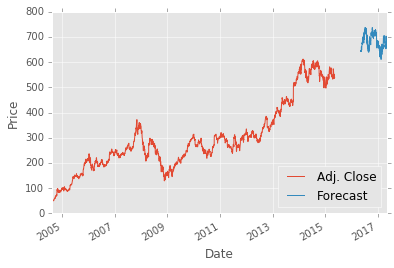

In [22]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day*365  ## getting predictions for 365 days after 365 days. 

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i] 
%matplotlib inline 

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc= 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
    
    
    



## Working of Regression:

### y = mx + c 

It's all about finding m and c  

c = y_ - m*x_

m = x_*y_ - xy_/(x_square - xsquare_)



## R squared --- Measure of accuracy of linreg model

R^2 = 1 -  Squared_error(y^)/ Squared_error(y_)

Closer to 1 the better it is. 